# Ejercicio 7

El circuito de la figura corresponde amplificador de potencia de RF sintonizado, realizado con un MOSFET, para una portadora de $f = 10 MHz$.

El amplificador de la figura trabaja en clase B

![ex 2.13](fig/circuitoClaseC.png)


Para este proyecto se busca máxima excursión de señal para un amplificador de RF Clase B. 

Se asume la impedancia del dispositivo a su salida entre  Drain  y Source es lo suficientemente elevada como para desestimarla frente a la carga.

|Symbol        | Parameter                  | Value     | Unit     |   
|--------------|----------------------------|-----------|----------|
|$V_{(BR)DSS}$ |  Drain source voltage      | $125$     | V        |
|$V_{GS}$      |  Gate source voltage       | $\pm 20$  | V        |
|$I_{D}$       |  Drain current             | $10$      | A        |
|$V_{(min)DS}$ |  Drain source voltage min. | $10$      | V        |

Impedancia de entrada del MOSFET a $f = 10MHz$ 
$$Z_{in}  = (4 -2j) \Omega$$ 

Impedancia de salida del MOSFET   a $f = 10MHz$ 
$$Z_{out} = (80-2j)  \Omega$$ 

![ex 2.13](fig/mosfet_intermo.png)


La tensión de excitación en Gate es una señal BLU.

La señal de BLU formada por dos tonos de igual nivel y frecuencias $f_1=9.99 MHz$ y  $f_2=10.10 MHz$


El Q cargado de ambos tanques (Gate y  Drain) es de $Q_C = 10$ y el  $Q_{oL} = Q_{oC} = infinito$ de los elementos reactivos es infinito. 

La tensión de fuente es de $V_{DD} = 50V$. 

Potencia en la carga $P_L = 150 W$. 


Se definen como componentes de intermodulación (IDM) de 3er orden  las que se encuentran en frecuencias:  $$|2(f_1-f_2)|\  y\ |2(f_2-f_1)|$$


Se definen como componentes de intermodulación (IDM) de 5to orden  las que se encuentran en frecuencias:  $$|3(f_1-f_2)|\  y\ |3(f_2-f_1)|$$


NOTA: En ambos casos (IDM de 3 y 5 orden) se desprecian dentro de los paréntesis los signos MAS ya que dichas componentes son eliminadas por el filtro de salida.
 

Determinar:

   1. $V_{GG}$ y $V_{s}$ (tener en cuenta que la señal es AM) 
   2. Componentes fundamentales de la corriente de drain Id1(f1), Id1(f2)
   3. Componentes de IDM de 3er orden de la corriente de drain 
   4. Componentes de IDM de 5to orden de la corriente de drain 
   5. $R_{o}$ para maxima escursión de la salida (dada la fuente de alimentación).
   6. $P_{dc}$.
   7. $P_{tr}$ 
   8. Rendimiento.
   9. Ganancia de potencia
   10. Rendimiento
   


![ex 2.13](fig/circuitoClaseC_mosfet_1.png)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq
from time import time



from IPython.display import Image  
%matplotlib inline
params = {'legend.fontsize': 24,
          'figure.figsize': (8, 8),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize':24,
         'ytick.labelsize':24}
plt.rcParams.update(params) 


In [2]:
#Calculos 
#parametros de la senal 
fc   = 10e6 #Hz
fm   = 10e3
th_c = np.pi
m    = 0.5




#tiempo de un periodo de la modulante
Tm  = 1/fm

#Muestreo
fs  =  24*fc

#delta time para el calculo de los armonicos
ds  = 1/(fs)



#parametros del filtro de entrada y de salida 
Qo = np.inf
Qc = 10

#parametros del transistor
Vds_min = 10  #V
Vds_max = 125 #V
Vgs_max = 7.5 #V
Vth     = 2.5 #V
Zin     =  4-2j #ohms
Zout    = 80-2j #ohms

# Generador
Zg      = 50 #ohms

# Carga
Zl      = 50 #ohms
rlp     = 5.33
VDD     = 50 #V
PL      = 150 #W
### Para los calculos!
#tiempo de un periodo 
Tc  = 1/fc

# muestreo (empleando 24 ya que corresponde a el muestreo del empleado comunmente en el metodo de los trapecios)
ns  =  24       
fs  =  fc*ns
ds  =  1/(fs)

In [3]:
#### 1

Vsp  = (Vgs_max-Vth)/(1-np.cos(th_c/2))
VGG = Vgs_max - Vsp

Vs   = Vsp/(1+m)
print('$Vs  = {:.2f}$'.format(Vs))

print('$VGG = {:.2f}$'.format(VGG))

$Vs  = 3.33$
$VGG = 2.50$


In [4]:
#### 2. $V_{gs(portadora)}$, $V_{gs(valle)}$ 

print('$v_gs(pico) = {:.2f} + {:.2f} cos(\\theta)$'.format(VGG,Vs*(1+m)))


print('$v_gs(portadora) = {:.2f} + {:.2f} cos(\\theta)$'.format(VGG,Vs))


print('$v_gs(valle) = {:.2f} + {:.2f} cos(\\theta)$'.format(VGG,Vs*(1-m)))

$v_gs(pico) = 2.50 + 5.00 cos(\theta)$
$v_gs(portadora) = 2.50 + 3.33 cos(\theta)$
$v_gs(valle) = 2.50 + 1.67 cos(\theta)$


In [5]:
#### 3. $i_{g}$ ( valor pico de la componente alterna de la excitación).

Yin = 1/Zin
Pinp = Vs**2*Yin.real/(4)

print('$P_inp = {:.2f} W$'.format(Pinp))

ig  = (Pinp*4/(Zg.real/2))**0.5

print('$igp = {:.2f} A$'.format(ig))

Pin = Pinp/(1+m)**2
print('$P_in = {:.2f} W$'.format(Pin))


$P_inp = 0.56 W$
$igp = 0.30 A$
$P_in = 0.25 W$


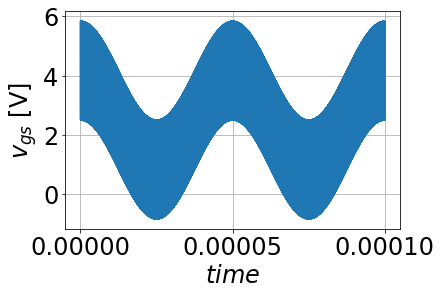

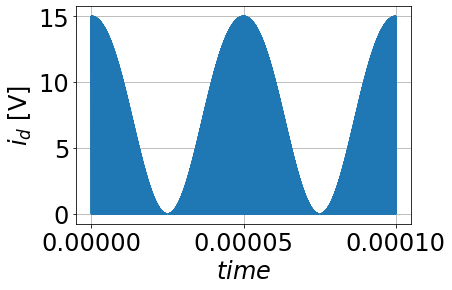

In [6]:
#### 4. $I_{do(pico)}$, $I_{d1(pico)}$

def vgsi(VGG,Vs,fm,fc,time):
    return VGG+Vs*(np.cos(2*np.pi*(fc-fm)*time))*(np.cos(2*np.pi*(fc+fm)*time))


def idi(v):
    i =  0.             if (v < 2.5) else 0
    i = 5*(v-2.5)-0.045*(v-2.5)**3 if (v >= 2.50  and v < 8) else i
    i = (20) if (v >= 8  ) else i
    return i


time = np.arange(0,Tm,ds)

vgs = vgsi(VGG,Vs,fm,fc,time)

idd = np.array([idi(v) for v in vgs])


plt.plot(time, vgs)
plt.ylabel('$v_{gs}$ [V]')
plt.xlabel('${time}$')

plt.grid()
plt.show()


plt.plot(time, idd)
plt.ylabel('$i_{d}$ [V]')
plt.xlabel('${time}$')

plt.grid()
plt.show()


In [ ]:
# FFT

Fam = fft(vgs) / len(vgs)  # Normalizada

frq = fftfreq(len(vgs), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Fam) )  

plt.xlim(-12e6, 12e6)
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

/home/aalmela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


In [ ]:
# FFT

Fam = fft(idd) / len(idd)  # Normalizada

frq = fftfreq(len(idd), ds)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Fam)*2 )  

plt.xlim(-2e6, 12e6)
plt.ylim(0, 14)
plt.xlabel('Frecuencia (MHz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()